In [152]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
oxides_train = pd.read_csv("oxides_Tg_train.csv")

In [154]:
x_train = oxides_train.copy()
y_train = x_train.pop('Tg')

In [155]:
x_train = np.array(x_train)

In [156]:
model = tf.keras.models.Sequential()
model.add(Dense(350,activation='relu'))
model.add(Dropout(0.06))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.11))
model.add(Dense(1,activation='linear'))

model.compile(loss = tf.keras.losses.Huber(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )

model.fit(x_train,
          y_train,
          batch_size=128,
          epochs = 100
          )

Epoch 1/100
319/319 [==============================] - 4s 9ms/step - loss: 257.1999 - root_mean_squared_error: 388.3278
Epoch 2/100
319/319 [==============================] - 3s 9ms/step - loss: 50.0700 - root_mean_squared_error: 69.8246
Epoch 3/100
319/319 [==============================] - 3s 9ms/step - loss: 48.3794 - root_mean_squared_error: 67.6994
Epoch 4/100
319/319 [==============================] - 3s 10ms/step - loss: 47.4170 - root_mean_squared_error: 66.4866
Epoch 5/100
319/319 [==============================] - 3s 10ms/step - loss: 46.1575 - root_mean_squared_error: 65.1597
Epoch 6/100
319/319 [==============================] - 3s 10ms/step - loss: 44.9343 - root_mean_squared_error: 63.7872
Epoch 7/100
319/319 [==============================] - 3s 10ms/step - loss: 44.0228 - root_mean_squared_error: 62.7110
Epoch 8/100
319/319 [==============================] - 3s 9ms/step - loss: 43.1944 - root_mean_squared_error: 61.9599
Epoch 9/100
319/319 [=============================

In [157]:
oxides_test = pd.read_csv("oxides_Tg_test.csv")
x_test = oxides_test.copy()
y_test = x_test.pop('Tg')

In [158]:
x_test = np.array(x_test)

In [159]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test rmse:", results)

Evaluate on test data
80/80 [==============================] - 1s 3ms/step - loss: 25.5305 - root_mean_squared_error: 41.5676
test loss, test rmse: [25.53045082092285, 41.567623138427734]


In [160]:
predictions = model.predict(x_test)

In [162]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9258826734812663

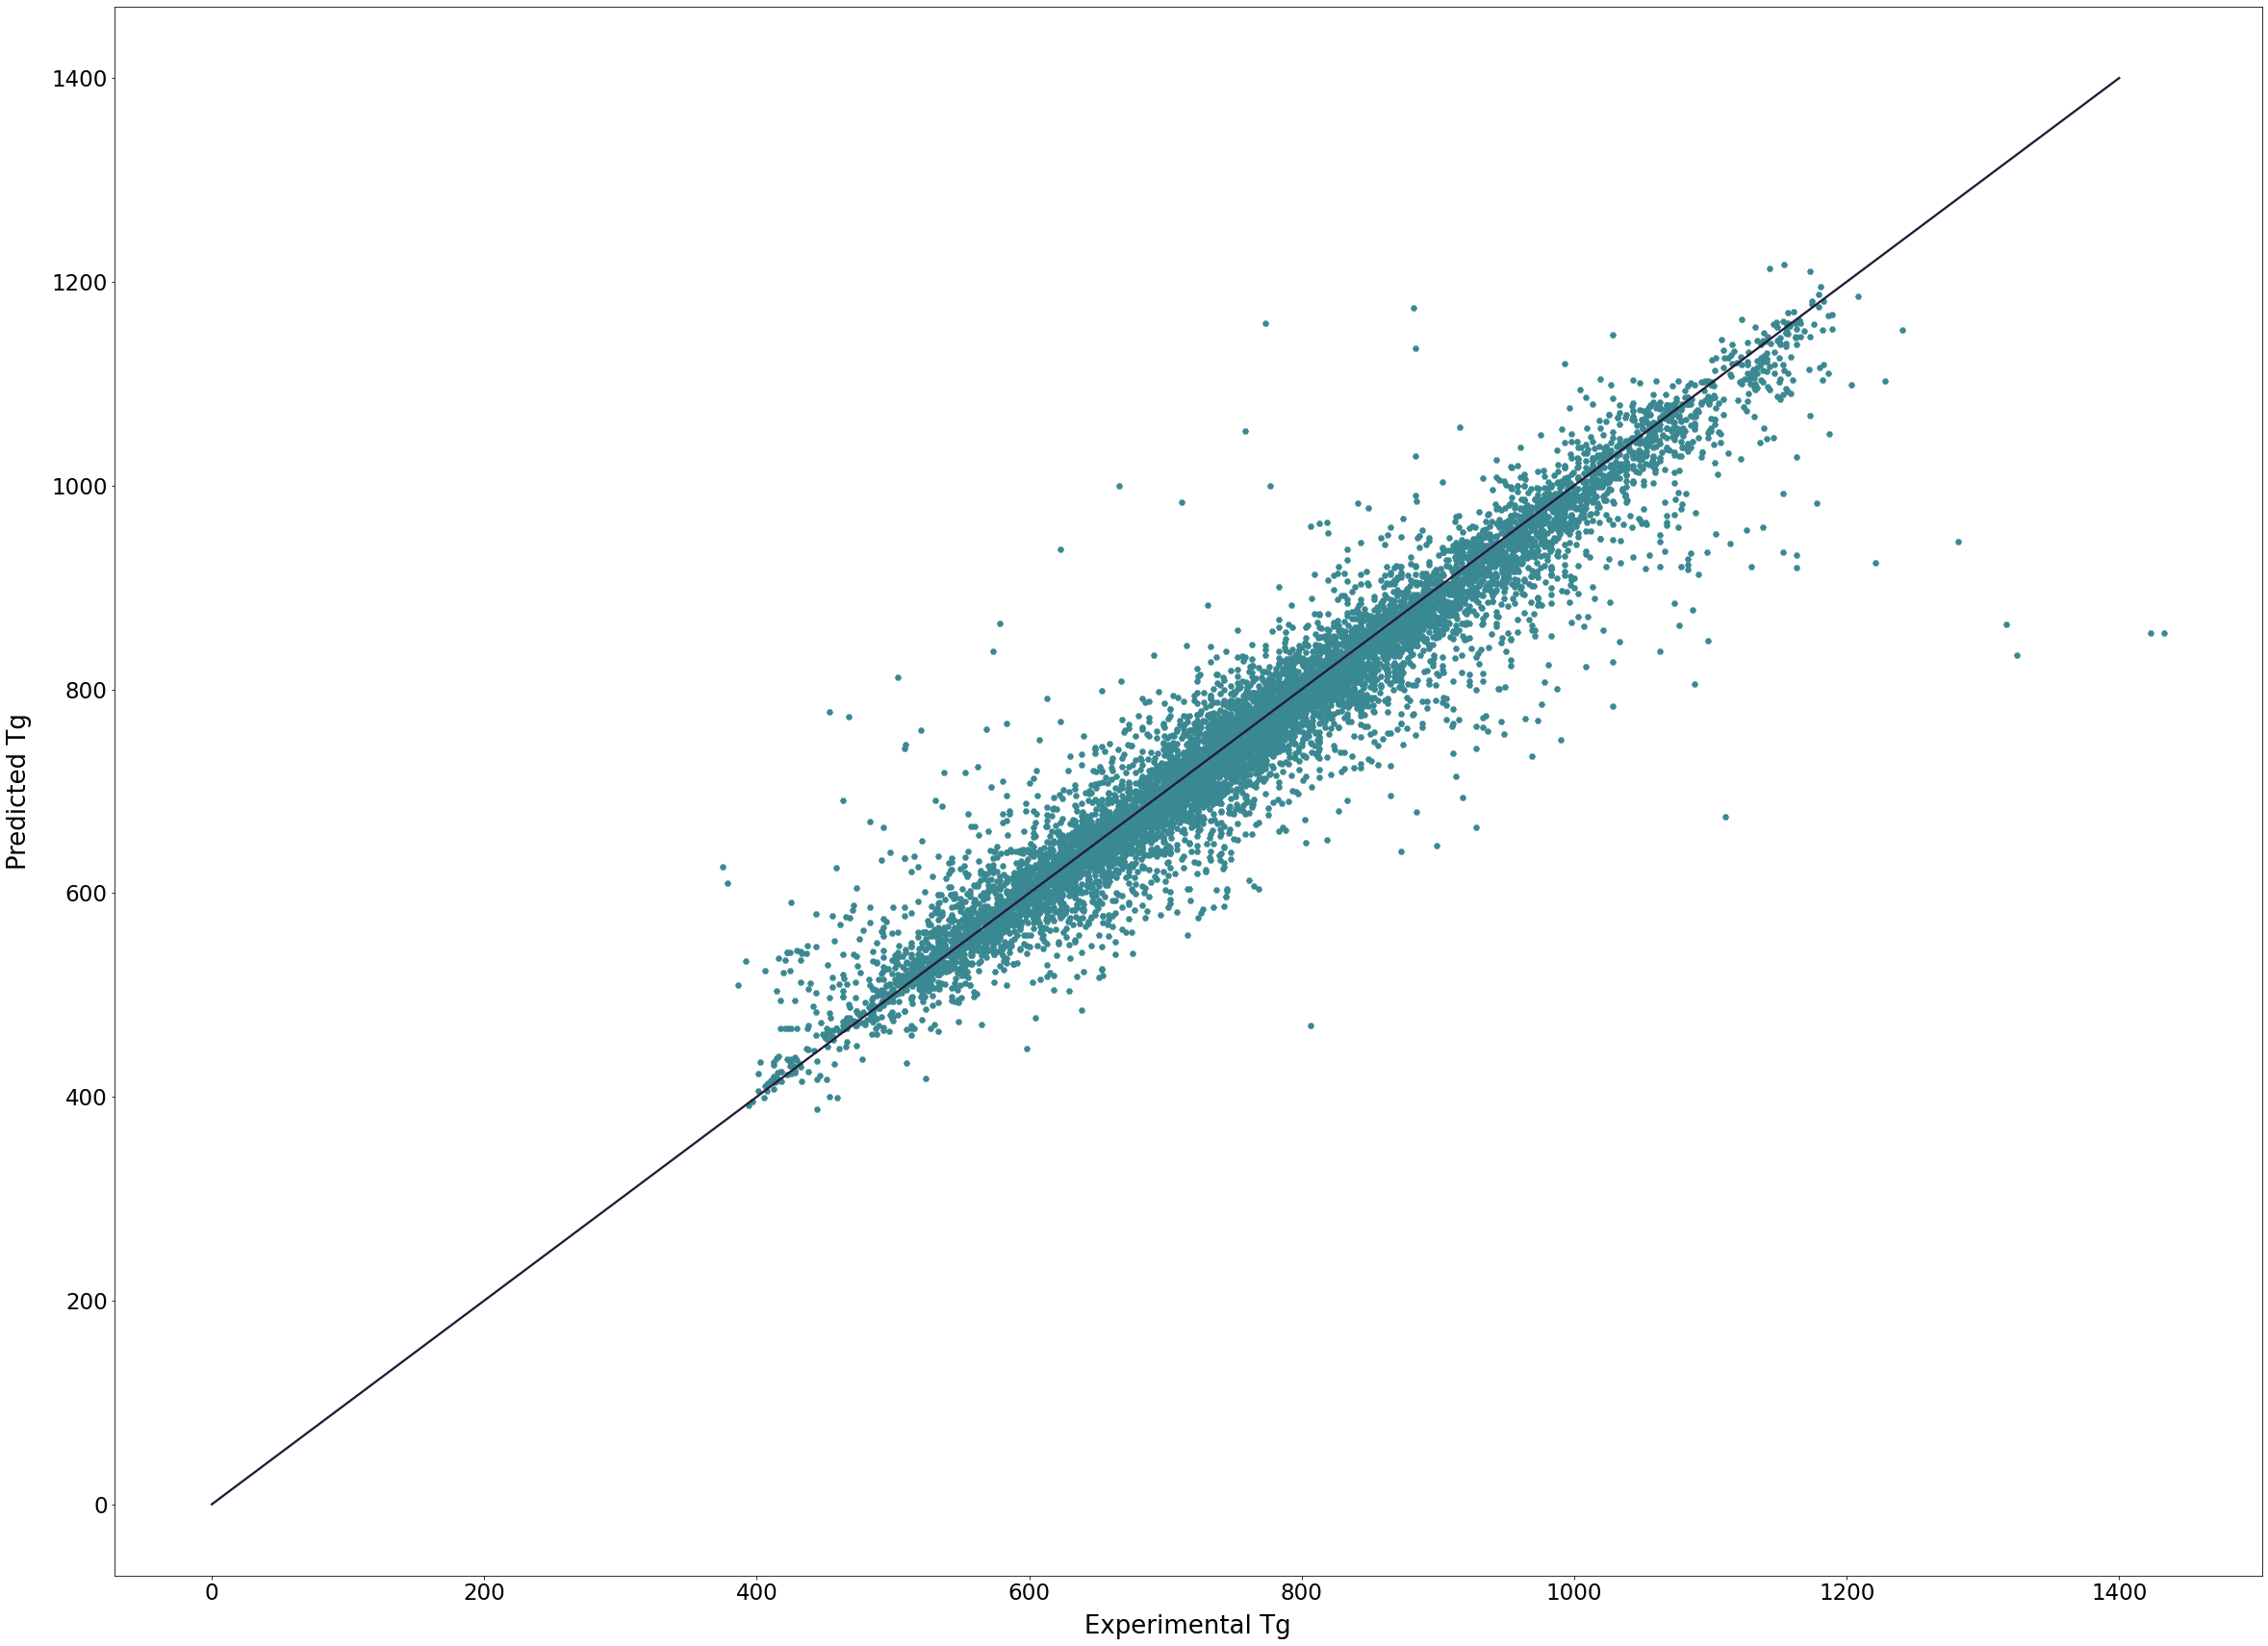

In [163]:
x_line=np.linspace(0,1400,1000)
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)
plt.scatter(y_test,predictions,marker='H',color='#3A8891')
plt.plot(x_line,x_line,color='#251B37',linewidth=2.3)
plt.xlabel('Experimental Tg', fontsize=26, labelpad = 10)
plt.ylabel('Predicted Tg', fontsize=26, labelpad = 20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()